<a href="https://colab.research.google.com/github/Pagadala-Ananya/DATA-ANALYSIS-USING-PYTHON/blob/main/2203A52046_PAGADALA_ANANYA_DAUP(PE_1)(DS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

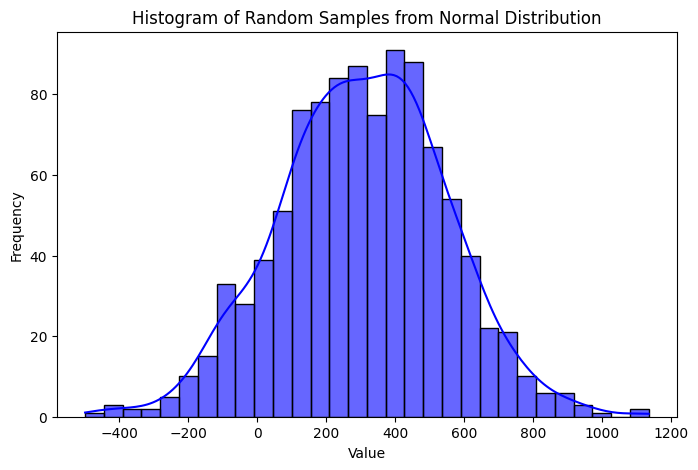

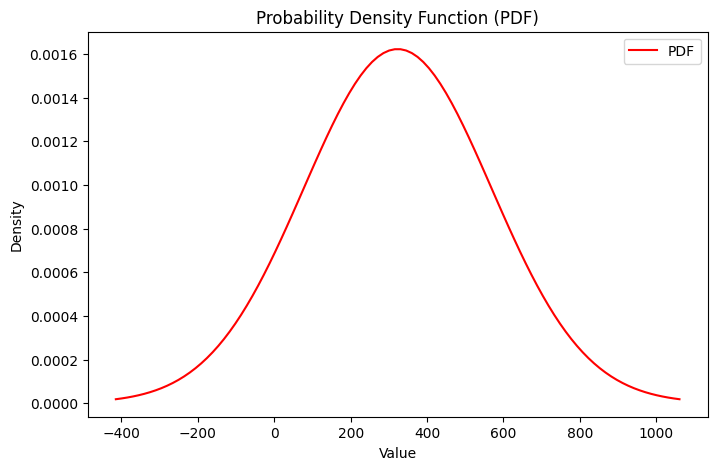

Probability below mean: 0.5
95th percentile: 727.412134255012


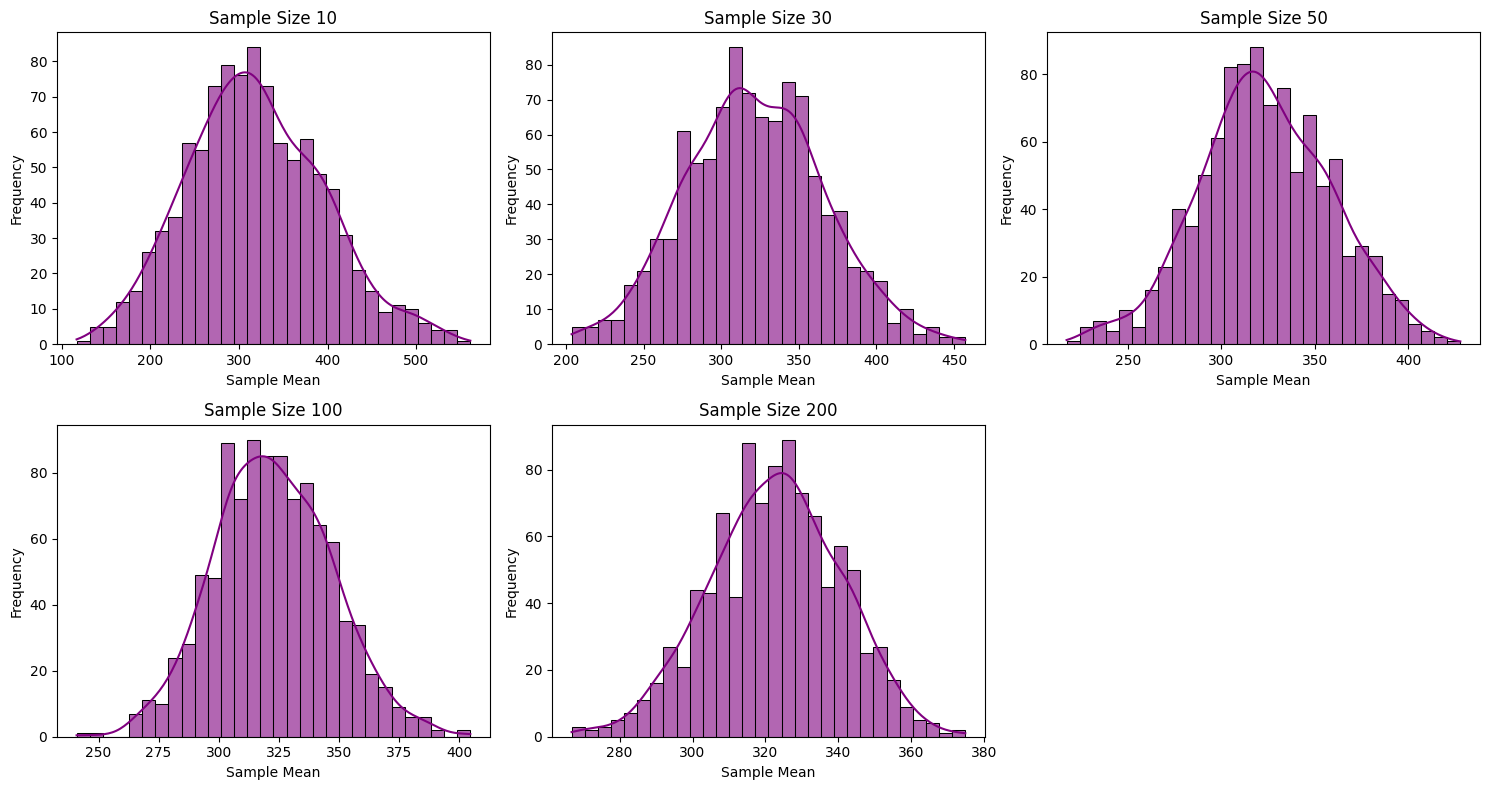

Original Skewness: 0.8912303920037631, Original Kurtosis: -0.08746991289329031
Sample Stats (Skewness, Kurtosis): {10: (0.2602927383393227, -0.11925608274921684), 30: (0.09122993748583914, -0.12463046360476948), 50: (0.0001671174995168783, -0.10925338936724627), 100: (0.1415781056377805, 0.0013095389810557911), 200: (-0.11079493999135713, -0.12175839369850472)}
99th percentile: 894.981575569966


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

file_path = "/content/supermarket_sales -.csv"
df = pd.read_csv(file_path)

data = df["Total"]

mean_total = np.mean(data)
std_total = np.std(data, ddof=1)

random_samples = np.random.normal(loc=mean_total, scale=std_total, size=1000)

plt.figure(figsize=(8, 5))
sns.histplot(random_samples, bins=30, kde=True, color='blue', alpha=0.6)
plt.title("Histogram of Random Samples from Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

prob_below_mean = stats.norm.cdf(mean_total, loc=mean_total, scale=std_total)

percentile_95 = stats.norm.ppf(0.95, loc=mean_total, scale=std_total)

x_values = np.linspace(mean_total - 3*std_total, mean_total + 3*std_total, 100)
pdf_values = stats.norm.pdf(x_values, loc=mean_total, scale=std_total)

plt.figure(figsize=(8, 5))
plt.plot(x_values, pdf_values, color='red', label="PDF")
plt.title("Probability Density Function (PDF)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

print(f"Probability below mean: {prob_below_mean}")
print(f"95th percentile: {percentile_95}")

def sample_means(data, sample_size, num_samples=1000):
    means = [np.mean(np.random.choice(data, size=sample_size, replace=True)) for _ in range(num_samples)]
    return means

sample_sizes = [10, 30, 50, 100, 200]
sample_means_dict = {size: sample_means(data, size) for size in sample_sizes}

# Plot histograms of sample means for different sample sizes
plt.figure(figsize=(15, 8))
for i, size in enumerate(sample_sizes, 1):
    plt.subplot(2, 3, i)
    sns.histplot(sample_means_dict[size], bins=30, kde=True, color='purple', alpha=0.6)
    plt.title(f"Sample Size {size}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

original_skewness = skew(data)
original_kurtosis = kurtosis(data)

sample_stats = {size: (skew(sample_means_dict[size]), kurtosis(sample_means_dict[size])) for size in sample_sizes}

print(f"Original Skewness: {original_skewness}, Original Kurtosis: {original_kurtosis}")
print(f"Sample Stats (Skewness, Kurtosis): {sample_stats}")

percentile_99 = stats.norm.ppf(0.99, loc=mean_total, scale=std_total)
print(f"99th percentile: {percentile_99}")